### Holiday Package Prediciton
### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("../Random Forest/dataset/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Cleaning
#### Handling Missing values
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
### check for all categoreis
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', "Unmarried")

In [8]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [10]:
## Checking missing values

na_features = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in na_features:
    print(feature, np.round(df[feature].isnull().mean()*100.5), "% missing values")

Age 5.0 % missing values
TypeofContact 1.0 % missing values
DurationOfPitch 5.0 % missing values
NumberOfFollowups 1.0 % missing values
PreferredPropertyStar 1.0 % missing values
NumberOfTrips 3.0 % missing values
NumberOfChildrenVisiting 1.0 % missing values
MonthlyIncome 5.0 % missing values


In [11]:
# stats on numerical columns (Null cols)
df[na_features].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [12]:
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True) # [0] accesses the first (and most frequent) mode value
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0])
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting, inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
# remove unnecessary column
df.drop('CustomerID', inplace=True, axis=1)

#### Feature Engineering
Feature Extraction

In [15]:
df['TotalVisting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True)

In [16]:
# get all numeric features 
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Feature:", len(num_features))

Number of Numerical Feature: 12


In [17]:
# get all Categorical features 
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Categorical Feature:", len(cat_features))

Number of Categorical Feature: 6


In [18]:
# Discrete Features
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("Numeber of Discrete Features:", len(dis_features))

Numeber of Discrete Features: 9


In [19]:
# Contineous Features
con_features = [feature for feature in num_features if feature not in dis_features]
print("Numeber of Contineous Features:", len(con_features))

Numeber of Contineous Features: 3


### Model Training

In [20]:
from sklearn.model_selection import train_test_split
x = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [21]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [23]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((3910, 17), (978, 17))

In [24]:
# create coloumn transformer with 3 types of transformers

cat_features = x.select_dtypes(include='object').columns
num_features = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [25]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisting'],
      dtype='object'))])

In [26]:
# apply transformation in training
x_train=preprocessor.fit_transform(x_train)

In [27]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.389411,1.073130,0.294405,-0.731971,-0.680643,1.534062,1.406426,-1.279971,-0.405448,0.642830
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.699181,0.521645,-0.680643,-0.651864,-0.052422,0.781268,-0.385666,-0.772424
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.707560,-0.276204,-0.699181,1.775261,-1.235083,-0.651864,1.406426,0.781268,0.266381,-1.480050
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.699181,-0.731971,0.428238,-0.651864,-0.781845,-1.279971,-1.221778,-0.772424
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-0.644204,0.294405,-0.731971,-0.126203,1.534062,-1.511269,0.781268,-0.373797,0.642830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.459796,0.294405,-0.731971,0.982678,1.534062,-0.052422,0.781268,2.258317,0.642830
3906,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.486381,0.337130,0.294405,-0.731971,-0.126203,-0.651864,1.406426,-1.279971,0.014115,-0.064797
3907,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-1.134871,0.294405,-0.731971,-0.126203,-0.651864,-0.052422,0.781268,-0.919587,-1.480050
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.707560,1.931797,-0.699181,-0.731971,0.982678,1.534062,0.677002,0.781268,0.856445,0.642830


In [28]:
x_test = preprocessor.transform(x_test)

#### Random Forest Classifier Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [30]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train Model

    # predicttions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train, y_train_pred) 
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) 

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9264
- F1 score: 0.9264
- Precision: 0.8000
- Recall: 0.8000
- Roc Auc Score: 0.8774


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9243
- F1 score: 0.9176
- Precision: 0.9569
- Recall: 0.6167
- Roc Auc Score: 0.8052




In [31]:
# HyperParameter Training
rf_params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [5, 8, 10, 15, None],
    "max_features": [5, 7, 8, "auto"],
    "min_samples_split": [2, 8, 15, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy", "log_loss"],
    "class_weight": [None, "balanced", "balanced_subsample"],
    "max_leaf_nodes": [None, 10, 20, 50],
    "min_weight_fraction_leaf": [0.0, 0.01, 0.05],
    "max_samples": [None, 0.5, 0.8]
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

randomcv_model = [
    ("RF", RandomForestClassifier(), rf_params),
]

In [33]:
modelParams = {}

for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model, 
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1)
    
    random.fit(x_train, y_train)
    modelParams[name] = random.best_params_

for model_name in modelParams:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(modelParams[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=8, max_leaf_nodes=10, max_samples=0.5, min_samples_leaf=4, min_samples_split=20, min_weight_fraction_leaf=0.01, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=8, max_leaf_nodes=10, max_samples=0.5, min_samples_leaf=4, min_samples_split=20, min_weight_fraction_leaf=0.01, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=8, max_leaf_nodes=10, max_samples=0.5, min_samples_leaf=4, min_samples_split=20, min_weight_fraction_leaf=0.01, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=15, max_features=7, max_leaf_nodes=20, max_samples=None, min_samples_leaf=8, min_samples_s

In [34]:

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        min_weight_fraction_leaf=0.0,
        min_samples_split=8,
        min_samples_leaf=1,
        max_samples=0.8,
        max_leaf_nodes=None,
        max_features=7,
        max_depth=15,
        criterion='gini',
        class_weight=None,
        bootstrap=True
    )
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train Model

    # predicttions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train, y_train_pred) 
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) 

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9691
- F1 score: 0.9680
- Precision: 0.9936
- Recall: 0.8419
- Roc Auc Score: 0.9203
----------------------------------
Model performance for Test set
- Accuracy: 0.8937
- F1 score: 0.8806
- Precision: 0.8878
- Recall: 0.4833
- Roc Auc Score: 0.7348




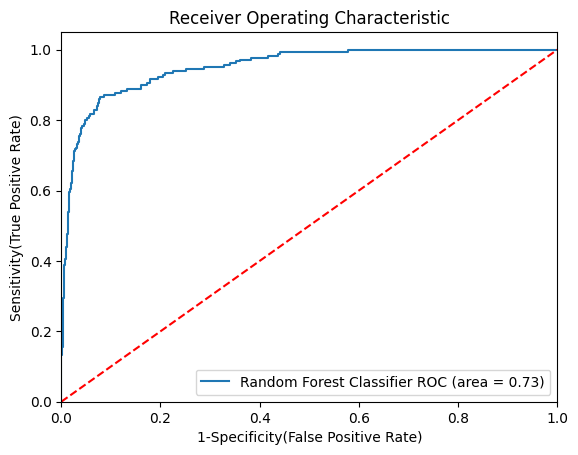

In [35]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': model,
        'auc': float(model_test_rocauc_score)
    }
]


for algo in auc_models:
    fpr, tpr, thresholds = roc_curve(y_test, algo['model'].predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()